## Crop Yield Prediction

### **Preview**

In this project, I aim to support precision agriculture by forecasting crop yields, enabling farmers to select crops with the best yield potential for their area.

---
#### **Dataset Prediction**

The dataset contains the following columns:

Area: Categorical (String), representing the country or region.

Item: Categorical (String), indicating the type of agricultural product.

Year: Numerical (Integer), denoting the year of the record.

hg/ha_yield: Numerical (Integer), crop yield in hectograms per hectare.

average_rain_fall_mm_per_year: Numerical (Float), average annual rainfall in millimeters.

pesticides_tonnes: Numerical (Float), amount of pesticides used in tonnes.

avg_temp: Numerical (Float), average yearly temperature in Celsius.



### Step 1: Import Libraries
Let us first the necessary libraries

In [24]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle  # For saving the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import gzip

### Step 2: Load Dataset

Let us load the dataset

In [25]:

df = pd.read_csv("yield_df.csv")

# Display the first few rows
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37


### Step 3: Data Processing

In [26]:
# Step 3.1: Drop Irrelevant Columns
df = df.drop(columns=["Unnamed: 0"])  # Keeping "Area"

In [27]:
# Step 3.2: Encode Categorical Data (Item & Area columns)
label_encoder_item = LabelEncoder()
df["Item"] = label_encoder_item.fit_transform(df["Item"])

label_encoder_area = LabelEncoder()
df["Area"] = label_encoder_area.fit_transform(df["Area"])

# Step 3.3: Define Features and Target Variable
X = df[["average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp", "Item", "Area", "Year"]]
y = df["hg/ha_yield"]

### Step 4: Model Training

In [28]:
# Step 4.1: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 4.2: Train Linear Regression with Gradient Descent
lr_model = SGDRegressor(max_iter=300, learning_rate="optimal", random_state=42)
train_losses = []
for i in range(1000):
    lr_model.partial_fit(X_train, y_train)
    y_train_pred = lr_model.predict(X_train)
    train_losses.append(mean_squared_error(y_train, y_train_pred))

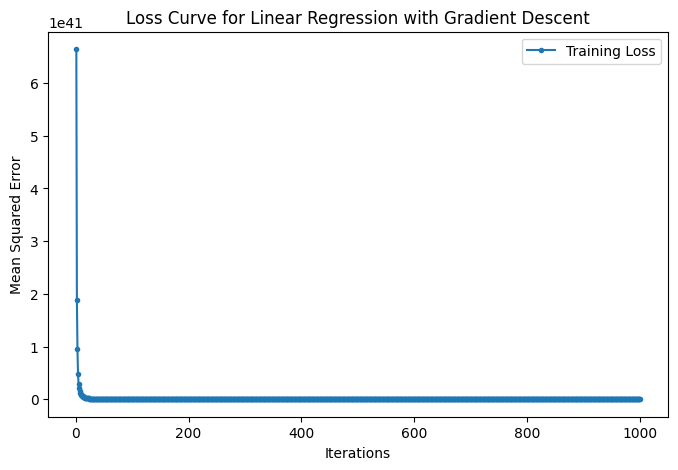

In [30]:
# Step 4.3: Plot loss curve with points
plt.figure(figsize=(8, 5))
plt.plot(range(1, 1001), train_losses, label='Training Loss', marker='o', markersize=3, linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Linear Regression with Gradient Descent")
plt.legend()
plt.show()

In [31]:
# Step 4.4: Train Decision Model and Random Forest

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
# Make Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (Loss)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Linear Regression MSE:", mse_lr)
print("Decision Tree MSE:", mse_dt)
print("Random Forest MSE:", mse_rf)

Linear Regression MSE: 6.931226793660895e+35
Decision Tree MSE: 180377041.12002125
Random Forest MSE: 103536893.58122501


### Step 5: Plot Predicted vs. Actual with Best-Fit Line for All Models

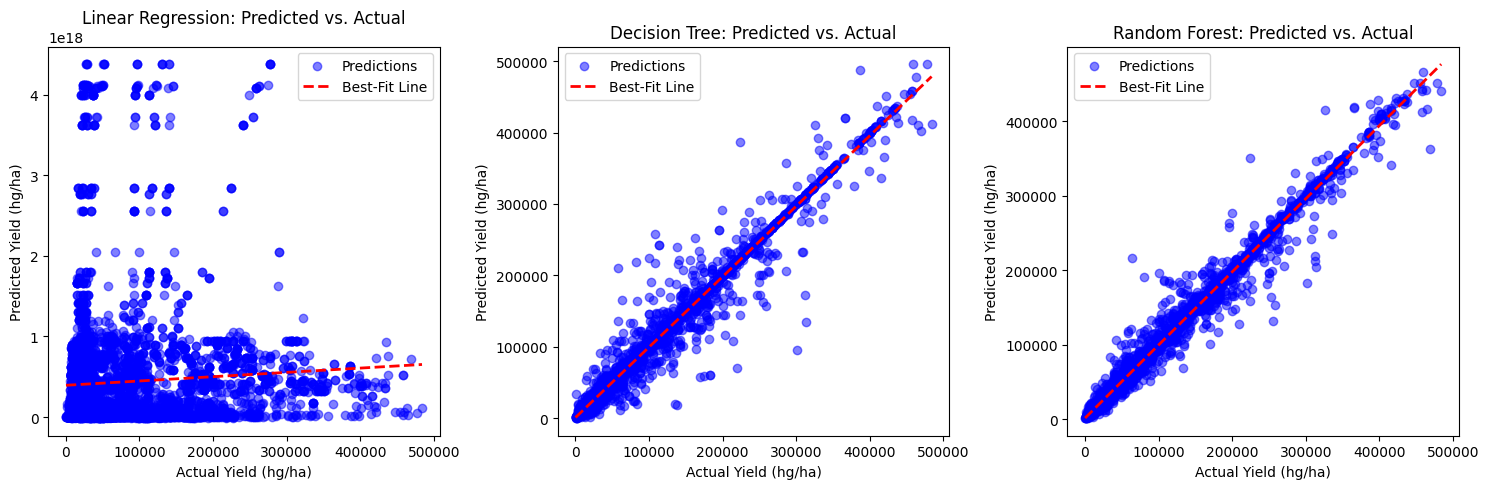

In [33]:
# Plot Predicted vs. Actual for All Models with Best-Fit Line Only
plt.figure(figsize=(15, 5))

# Linear Regression (SGDRegressor)
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Predictions')

# Best-fit line
coefficients_lr = np.polyfit(y_test, y_pred_lr, 1)  # Linear fit (degree 1)
best_fit_lr = np.poly1d(coefficients_lr)
x_range = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_range, best_fit_lr(x_range), 'r--', lw=2, label='Best-Fit Line')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Linear Regression: Predicted vs. Actual')
plt.legend()

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='blue', label='Predictions')

# Best-fit line (red dashed)
coefficients_dt = np.polyfit(y_test, y_pred_dt, 1)
best_fit_dt = np.poly1d(coefficients_dt)
x_range = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_range, best_fit_dt(x_range), 'r--', lw=2, label='Best-Fit Line')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Decision Tree: Predicted vs. Actual')
plt.legend()

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predictions')

# Best-fit line
coefficients_rf = np.polyfit(y_test, y_pred_rf, 1)
best_fit_rf = np.poly1d(coefficients_rf)
x_range = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_range, best_fit_rf(x_range), 'r--', lw=2, label='Best-Fit Line')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Random Forest: Predicted vs. Actual')
plt.legend()

plt.tight_layout()
plt.show()

### Step 6: Save the best model based on MSE

In [34]:
# Save the Best Model (Random Forest)
with gzip.open("best_model.pkl.gz", "wb") as model_file:
    pickle.dump(rf_model, model_file)

# Save the label encoders 
with open("label_encoder_item.pkl", "wb") as model_file:
    pickle.dump(label_encoder_item, model_file)
with open("label_encoder_area.pkl", "wb") as model_file:
    pickle.dump(label_encoder_area, model_file)

print("Best model saved as 'best_model.pkl'.")

Best model saved as 'best_model.pkl'.


### Stpe 7: Make a prediction function

In [35]:
def predict_yield(rainfall, pesticide, temp, item_name, area_name, year):
    """
    Function to predict crop yield based on inputs.
    :param rainfall: Annual rainfall (mm)
    :param pesticide: Pesticide usage (tonnes)
    :param temp: Average temperature (°C)
    :param item_name: Name of the crop (string)
    :param area_name: Name of the area (string)
    :return: Predicted yield (hg/ha)
    """
    # Load model
    with gzip.open("best_model.pkl.gz", "rb") as model_file:
        model = pickle.load(model_file)

    # Encode Item and Area
    item_encoded = label_encoder_item.transform([item_name])[0]
    area_encoded = label_encoder_area.transform([area_name])[0]

    # Create input array
    input_data = np.array([[rainfall, pesticide, temp, item_encoded, area_encoded, year]])

    # Make prediction
    prediction = model.predict(input_data)
    print(f"Predicted Yield for {item_name} in {area_name}: {prediction[0]:.2f} hg/ha")
    return prediction[0]

# Example usage
predicted_yield = predict_yield(1485, 121, 16.37, "Maize", "Rwanda", 2003)


Predicted Yield for Maize in Rwanda: 25241.57 hg/ha


c:\Users\TSR\Desktop\Summative\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Conclusion**

I had a great time making a project to guess how much crops will grow using a computer. I tried three different ways to guess: one called linear regression (using something called SGDRegressor), another called a decision tree, and the last one called a random forest. First, I got a big set of information from Kaggle about crops from 101 countries between 1990 and 2019—it had 28,242 rows! I had to clean it up by turning words like crop names and countries into numbers so the computer could understand them. I also split the information into two parts: 80% to teach the computer and 20% to test if it learned well.

For the linear regression, I taught the computer step-by-step over 1000 tries, and I made a picture to show how much it was learning each time by looking at its mistakes (called MSE). The decision tree and random forest were easier to teach—they learned all at once! The random forest used 100 little trees to make its guesses. I also made pictures to show how close the guesses were to the real crop amounts, with a red dotted line to show the pattern of the guesses.

In the end, the random forest was the best at guessing because it made the smallest mistakes. It’s really good at understanding tricky stuff, like how rain and temperature work together to change how much crops grow in different places. The other ways weren’t as good—linear regression only likes simple patterns, and the decision tree sometimes got too stuck on the training information. I saved the random forest to use in an app I made with Flutter, so farmers can use it to plan their crops better. It’s awesome for helping farmers, and maybe later I can add more things like dirt information to make it even better!